Zum ausführen des Notebooks benötigen Sie:
* requests
* BeautifulSoup
* Pillow
* pandas
```sh
pip install requests beautifulsoup4 Pillow pandas
```

# Projekt: Datenquellen im Internet, Webscraping

Hier soll es darum Datensätze von Webseiten zu sammeln oder durch diese Daten anzureichern. Dafür sind 2 Python Module besonders hilfreich

In [1]:
import requests

Das requests Modul https://docs.python-requests.org/en/master/ bietet eine elegante Oberfläche um HTTP Anfragen an Webserver zu stellen. Alle typischen HTTP Methoden werden unterstützt, es können einfach Header mitgegeben werden, z.B. für Authorisierung und dergleichen.

In [2]:
from bs4 import BeautifulSoup

Das Beautiful Soup Modul https://www.crummy.com/software/BeautifulSoup/bs4/doc/ bietet eine Möglichkeit HTML und XML Strukturen zu bearbeiten, durchsuchen und verändern.

## Beispiel: HTML einer Website anfordern und bearbeiten

Mit `requests.get` kann der Inhalt einer Seite angefordert werden. Das resultierende Response Objekt hat unter anderen das Attribut text. Hier ist dann etwa das HTML der Seite gespeichert

In [3]:
import requests
from bs4 import BeautifulSoup

response_rfc = requests.get('https://www.rfc-editor.org/rfc/rfc1945.html')
html_rfc = BeautifulSoup(response_rfc.text)

BeautifulSoup liest den HTML Code ein und man erhält bei der Ausgabe eine leicht formatierte Version

In [4]:
print(html_rfc)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head profile="http://dublincore.org/documents/2008/08/04/dc-html/">
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="index,follow" name="robots"/>
<meta content="rfcmarkup version 1.129b" name="creator"/>
<link href="http://purl.org/dc/elements/1.1/" rel="schema.DC"/>
<meta content="urn:ietf:rfc:1945" name="DC.Identifier"/>
<meta content="" name="DC.Relation.Replaces"/><meta content="T. Berners-Lee" name="DC.Creator"/><meta content="R. Fielding" name="DC.Creator"/><meta content="H. Frystyk" name="DC.Creator"/><meta content="May, 1996" name="DC.Date.Issued"/>
<meta content=" Hypertext Transfer Protocol -- HTTP/1.0 " name="DC.Title"/>
<title>RFC 1945:  Hypertext Transfer Protocol -- HTTP/1.0 </title>
<style type="text/css">
	@media only screen 
	  and (min-width: 99

Jetzt kann man auch im BeautifulSoup Objekt suchen, zum Beispiel alle **a** HTML tags

In [5]:
html_rfc.find_all('a')

[<a href="https://www.rfc-editor.org" title="RFC Editor">RFC Home</a>,
 <a href="/rfc/rfc1945.txt">TEXT</a>,
 <a href="/rfc/pdfrfc/rfc1945.txt.pdf">PDF</a>,
 <a href="/rfc/rfc1945.html">HTML</a>,
 <a href="https://datatracker.ietf.org/doc/rfc1945" title="IETF Datatracker information for this document">Tracker</a>,
 <a href="https://datatracker.ietf.org/ipr/search/?rfc=1945&amp;submit=rfc" title="IPR disclosures related to this document">IPR</a>,
 <a href="#section-1">1</a>,
 <a href="#page-4">4</a>,
 <a href="#section-1.1">1.1</a>,
 <a href="#page-4">4</a>,
 <a href="#section-1.2">1.2</a>,
 <a href="#page-4">4</a>,
 <a href="#section-1.3">1.3</a>,
 <a href="#page-6">6</a>,
 <a href="#section-1.4">1.4</a>,
 <a href="#page-8">8</a>,
 <a href="#section-2">2</a>,
 <a href="#page-8">8</a>,
 <a href="#section-2.1">2.1</a>,
 <a href="#page-8">8</a>,
 <a href="#section-2.2">2.2</a>,
 <a href="#page-10">10</a>,
 <a href="#section-3">3</a>,
 <a href="#page-12">12</a>,
 <a href="./rfc1945">RFC 19

## Beispiel: Konsumieren von offenen Schnittstellen

Viele Websites haben offene Schnittstellen über die Daten angefragt werden können. Das hat den Vorteil, dass die Daten ohne das lästige HTML angefordert und einfacher verarbeitet werden können

In [6]:
from pprint import pp # Mit pp aus pprint können besonders komplexe json Objekte etwas übersichtler angezeigt werden
import requests

response_tagesschau = requests.get('https://tagesschau.de/api2/news')
data_tagesschau = response_tagesschau.json()
pp(data_tagesschau)

{'news': [{'sophoraId': 'elektroladesaeulen-bezahlsystem-101',
           'externalId': '9d7bdc31-4f62-4dfe-8403-6a4bc9211e83',
           'title': "Wo geht's hier zur Ladesäule?",
           'teaserImage': {'title': '',
                           'copyright': 'picture alliance/dpa/dpa-Zentralbild',
                           'alttext': 'Verkehrsschild zeigt einen Parkplatz '
                                      'mit Ladesäulen für Elektroautos an',
                           'preferredVariants': '16x9',
                           'type': 'image',
                           'videowebl': {'imageurl': 'https://www.tagesschau.de/multimedia/bilder/ladesaeule-101~_v-videowebl.jpg'},
                           'portraetgrossplus8x9': {'imageurl': 'https://www.tagesschau.de/multimedia/bilder/ladesaeule-101~_v-portraetgrossplus8x9.jpg'},
                           'videowebm': {'imageurl': 'https://www.tagesschau.de/multimedia/bilder/ladesaeule-101~_v-videowebm.jpg'},
                        

           'title': 'U18-Wahl: Viele Stimmen für kleine und "sonstige" '
                    'Parteien',
           'teaserImage': {'title': 'Ein elfjähriges Mädchen sitzt bei der '
                                    'U18-Europawahl in einer Wahlkabine. | '
                                    'Bildrechte: dpa',
                           'alttext': 'Ein elfjähriges Mädchen sitzt bei der '
                                      'U18-Europawahl in einer Wahlkabine.',
                           'preferredVariants': '16x9',
                           'type': 'image',
                           'videowebl': {'imageurl': 'https://www.tagesschau.de/ardimport/regional/sachsenanhalt/mdr-image-185269~_v-videowebl.jpg'},
                           'portraetgrossplus8x9': {'imageurl': 'https://www.tagesschau.de/ardimport/regional/sachsenanhalt/mdr-image-185269~_v-portraetgrossplus8x9.jpg'},
                           'videowebm': {'imageurl': 'https://www.tagesschau.de/ardimport/regional/sachsenan

                           'portraetgross8x9': {'imageurl': 'https://www.tagesschau.de/multimedia/bilder/sendungsbild-754645~_v-portraetgross8x9.jpg'}},
           'date': '2021-05-29T14:05:00.000+02:00',
           'tracking': [{'sid': 'app.multimedia.video.video-870409',
                         'src': 'ard-aktuell',
                         'ctp': 'segment',
                         'pdt': '20210529T1408',
                         'otp': 'video',
                         'cid': 'video-870409',
                         'pti': 'tagesschau_in_100_Sekunden',
                         'type': 'generic'},
                        {'type': 'nielsen',
                         'assetid': 'video-870409',
                         'program': 'Tagesschau',
                         'title': 'tagesschau_in_100_Sekunden',
                         'length': '113',
                         'c2': 'p2,N',
                         'c5': 'p5,https://www.tagesschau.de/multimedia/video/video-870409.html',
  

                    {'tag': 'Massentourismus'},
                    {'tag': 'Schwaben'},
                    {'tag': 'Bayern'}],
           'updateCheckUrl': 'https://www.tagesschau.de/api2/ardimport/regional/bayern/br-story-20921~_lastKnown-606FF2A37E553B17EBB269CFA0C44A9B_view-hasChanged.json',
           'regionId': 2,
           'regionIds': [2],
           'details': 'https://www.tagesschau.de/api2/ardimport/regional/bayern/br-story-20921.json',
           'detailsweb': 'https://www.tagesschau.de/ardimport/regional/bayern/br-story-20921.html',
           'shareURL': 'https://www.br.de/nachrichten/bayern/besucherlenkung-im-allgaeu-ein-projekt-gegen-den-massen-tourismus,SYn4yLg',
           'topline': 'Bayern',
           'firstSentence': 'Die Berge sind der neue Sehnsuchtsort vieler '
                            'Menschen.',
           'geotags': [{'tag': '(Keine Auswahl)'}],
           'brandingImage': {'title': 'Logo BR',
                             'copyright': 'tagesschau.de, 

                           'portraetgross8x9': {'imageurl': 'https://www.tagesschau.de/multimedia/bilder/lukaschenko-187~_v-portraetgross8x9.jpg'}},
           'date': '2021-05-29T12:04:00.000+02:00',
           'tracking': [{'sid': 'app.multimedia.video.video-870323',
                         'src': 'ard-aktuell',
                         'ctp': 'segment',
                         'pdt': '20210529T1207',
                         'otp': 'video',
                         'cid': 'video-870323',
                         'pti': 'Nach_erwzungener_Flugzeuglandung_US-Sanktionen_gegen_Lukaschenko-Regime',
                         'type': 'generic'},
                        {'type': 'nielsen',
                         'assetid': 'video-870323',
                         'program': 'Tagesschau',
                         'title': 'Nach_erwzungener_Flugzeuglandung_US-Sanktionen_gegen_Lukaschenko-Regime',
                         'length': '21',
                         'c2': 'p2,N',
               

                         'ctp': 'meldung',
                         'pdt': '20210529T1115',
                         'otp': 'meldung',
                         'cid': 'sr-story-27579',
                         'pti': '65_neue_Coronainfektionen',
                         'type': 'generic'}],
           'tags': [{'tag': 'sr'}],
           'updateCheckUrl': 'https://www.tagesschau.de/api2/ardimport/regional/saarland/sr-story-27579~_lastKnown-91A531D4A6412D56E40BC19246D55635_view-hasChanged.json',
           'regionId': 12,
           'regionIds': [12],
           'details': 'https://www.tagesschau.de/api2/ardimport/regional/saarland/sr-story-27579.json',
           'detailsweb': 'https://www.tagesschau.de/ardimport/regional/saarland/sr-story-27579.html',
           'shareURL': 'http://www.sr.de/sr/home/nachrichten/panorama/corona_aktuelle_fallzahlen_saarland_100.html',
           'topline': 'Saarland',
           'firstSentence': 'Das RKI hat am Samstag für das Saarland 65 neue '
        

                                    'setzt darauf, dass bis zum Sommer auch '
                                    'ein Corona-Impfstoff für Kinder und '
                                    'Jugendliche zur Verfügung steht.',
                           'copyright': 'dpa',
                           'alttext': 'Eine Mitarbeiterin eines Impfteams '
                                      'zieht eine Spritze mit dem '
                                      'Coronavirus-Vakzin auf.',
                           'preferredVariants': '16x9',
                           'type': 'image',
                           'videowebl': {'imageurl': 'https://www.tagesschau.de/multimedia/bilder/coronavirus-impfen-107~_v-videowebl.jpg'},
                           'portraetgrossplus8x9': {'imageurl': 'https://www.tagesschau.de/multimedia/bilder/coronavirus-impfen-107~_v-portraetgrossplus8x9.jpg'},
                           'videowebm': {'imageurl': 'https://www.tagesschau.de/multimedia/bilder/coronavirus-impfe

                                    'Ansatzpunkt: Radwege (Symbolbild).',
                           'alttext': 'Die Initiative MainzZero will, dass '
                                      'Mainz schon bis 2030 klimaneutral wird. '
                                      'Ein Ansatzpunkt: Radwege (Symbolbild).',
                           'preferredVariants': '16x9',
                           'type': 'image',
                           'videowebl': {'imageurl': 'https://www.tagesschau.de/ardimport/regional/rheinlandpfalz/swr-rp-image-65113~_v-videowebl.jpg'},
                           'portraetgrossplus8x9': {'imageurl': 'https://www.tagesschau.de/ardimport/regional/rheinlandpfalz/swr-rp-image-65113~_v-portraetgrossplus8x9.jpg'},
                           'videowebm': {'imageurl': 'https://www.tagesschau.de/ardimport/regional/rheinlandpfalz/swr-rp-image-65113~_v-videowebm.jpg'},
                           'videowebs': {'imageurl': 'https://www.tagesschau.de/ardimport/regional/rheinlan

                         'type': 'generic'}],
           'tags': [{'tag': 'Liveblog'}, {'tag': 'Coronavirus'}],
           'updateCheckUrl': 'https://www.tagesschau.de/api2/newsticker/liveblog-coronavirus-samstag-241~_lastKnown-663A250194034E3C987D372E78872ADD_view-hasChanged.json',
           'regionId': 0,
           'details': 'https://www.tagesschau.de/api2/newsticker/liveblog-coronavirus-samstag-241.json',
           'detailsweb': 'https://www.tagesschau.de/newsticker/liveblog-coronavirus-samstag-241.html',
           'shareURL': 'https://www.tagesschau.de/newsticker/liveblog-coronavirus-samstag-241.html',
           'topline': 'Coronavirus-Pandemie',
           'firstSentence': 'Die aktuellen Entwicklungen zur '
                            'Coronavirus-Pandemie im Liveblog.',
           'geotags': [{'tag': 'Hamburg'}],
           'type': 'story'},
          {'sophoraId': 'usa-belarus-101',
           'externalId': 'ce04c19e-36d2-4553-a302-579b5a492905',
           'title': 'US-Sa

# Aufgabe: Suchen Sie sich eine Schnittstelle oder Website und sammeln und Visualisieren Sie die Daten

Sie können nehmen was Sie wollen, ein Vorschlag aus aktuellem Anlass: https://api.corona-zahlen.org/docs/

<AxesSubplot:xlabel='date'>

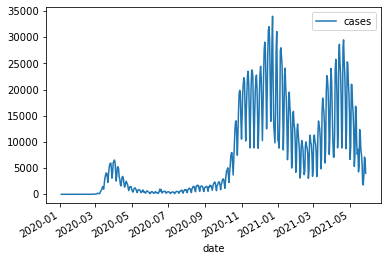

In [7]:
from pprint import pp
from datetime import datetime

import pandas as pd
import requests

response_ger_hist = requests.get('https://api.corona-zahlen.org/germany/history')
histroy_ger_cases = response_ger_hist.json()
ger_cases = [{'cases': point['cases'], 'date': datetime.fromisoformat(point['date'][:-1])}
             for point in histroy_ger_cases['data']]
# pp(histroy_ger_cases) # Einfach Kommentar entfernen um die Response anzusehen
df_cases_ger = pd.DataFrame(ger_cases)
df_cases_ger.plot(x='date', y='cases')

<AxesSubplot:xlabel='date'>

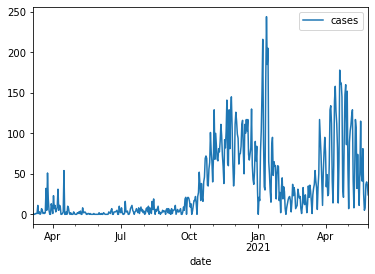

In [8]:
import requests
import pandas as pd

# Um Daten für einen bestimmten Kreis zu bekommen benötigt man die ID
response_districts = requests.get('https://api.corona-zahlen.org/districts')
district_data = response_districts.json()
# pp(district_data) # Einfach Kommentar entfernen um die Response anzusehen
bielefeld_dist_data = [district for district in district_data['data'].values() if district['name'] == 'Bielefeld'][0]
bielefeld_id = bielefeld_dist_data['ags']

# Mit dieser ID können dann Daten für den konkreten Kreis abgefragt werden
response_bielefeld = requests.get(f'https://api.corona-zahlen.org/districts/{bielefeld_id}/history/cases')
bielefeld_case_data = response_bielefeld.json()
bielefeld_cases = [{'cases': point['cases'], 'date': datetime.fromisoformat(point['date'][:-1])}
                   for point in bielefeld_case_data['data'][bielefeld_id]['history']]
bielefeld_cases_df = pd.DataFrame(bielefeld_cases)
bielefeld_cases_df.plot(x='date', y='cases')

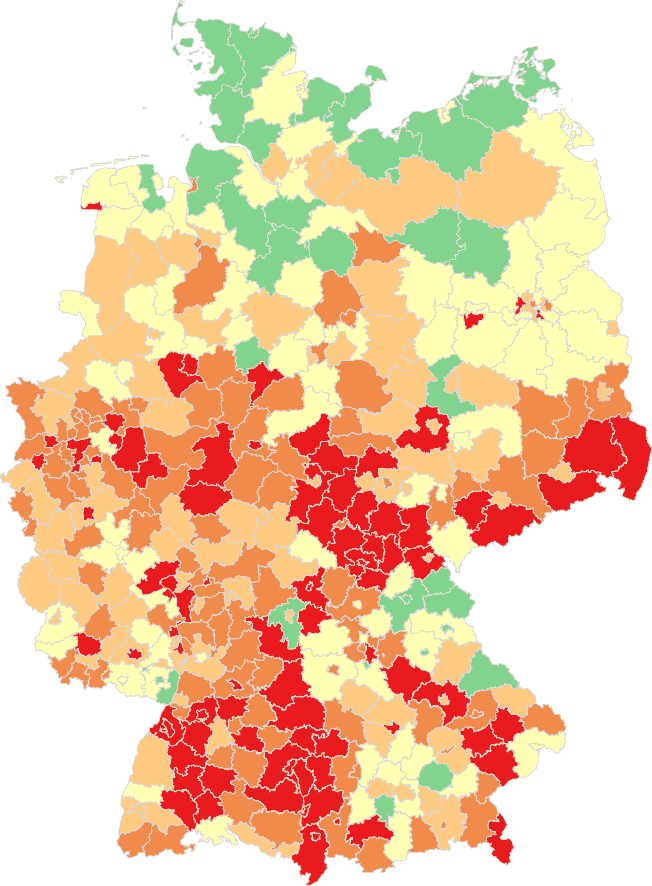

In [9]:
import requests
from PIL import Image # Hier wird Pillow für die Verarbeitung des Bildes benutzt
from io import BytesIO # BytesIO erzeugt einen Byte Stream der von Pillow verwendet werden kann

response_heatmap = requests.get('https://api.corona-zahlen.org/map/districts') # gibt die Bytes des Bildes zurück
Image.open(BytesIO(response_heatmap.content))